In [3]:
from utils import *
from data_utils import *
from solver import *
from cnn import *

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# for auto-re00loading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
# %load_ext autoreload
# %autoreload 2

test_ctx()

/Users/Herb/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:28: UserWarning: [Errno 28] No space left on device.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/Users/Herb/anaconda3/lib/python3.6/site-packages/urllib3/contrib/pyopenssl.py:46: DeprecationWarning: OpenSSL.rand is deprecated - you should use os.urandom instead
  import OpenSSL.SSL


CPU or GPU? :  cpu(0)


In [4]:
!ls ../GW_data/
!ls ../Noise_data1/

GW_test_full.csv                     GW_train_full.csv
GW_test_m112_m267.19999999999999.csv GW_train_m111_m271.5.csv
GW_test_m130_m272.0.csv              GW_train_m129_m272.5.csv
LigoNose9_9000_8192_1.csv LigoNose9_9000_8192_2.csv


In [5]:
%%time
data_GW_train = pd.read_csv('../GW_data/GW_train_full.csv', index_col=0, nrows=100)
print('The shape of data_GW_train: ' , data_GW_train.shape)

noise1 = pd.read_csv('../Noise_data1/LigoNose9_9000_8192_1.csv', index_col=0, nrows = 1000)
print('The shape of the noise1: ', noise1.shape)

noise_train = pd.read_csv('../Noise_data1/LigoNose9_9000_8192_2.csv', index_col=0, nrows = 1000)
print('The shape of the noise_train: ', noise_train.shape)

data_GW_test = pd.read_csv('../GW_data/GW_test_full.csv', index_col=0, nrows = 100)
print('The shape of data_GW_test: ' , data_GW_test.shape)

noise2 = pd.read_csv('../Noise_data1/LigoNose9_9000_8192_1.csv', index_col=0, nrows = 1000)
print('The shape of the noise2: ', noise2.shape)

noise_test = pd.read_csv('../Noise_data1/LigoNose9_9000_8192_2.csv', index_col=0, nrows = 1000)
print('The shape of the noise_test: ', noise_test.shape)

The shape of data_GW_train:  (100, 8192)
The shape of the noise1:  (1000, 8192)
The shape of the noise_train:  (1000, 8192)
The shape of data_GW_test:  (100, 8192)
The shape of the noise2:  (1000, 8192)
The shape of the noise_test:  (1000, 8192)
CPU times: user 22.3 s, sys: 993 ms, total: 23.3 s
Wall time: 23.6 s


In [6]:
sampling_freq = 8192
colomns = [ str(i) for i in range(sampling_freq)] + ['mass','positions','gaps','max_peak','sigma','SNR_mf','SNR_mf0']

train_dict = {}
test_dict = {}

In [7]:
%%time

data_train = creat_data(data_GW_train, noise1, 1)
print(data_train.shape)
print(data_train.SNR_mf.mean())

data_test = creat_data(data_GW_test, noise2, 1)
print(data_test.shape)
print(data_test.SNR_mf.mean())

train_dict['%s' %str(1)] = pd.concat([data_train, noise_train.iloc[:data_train.shape[0],:]])[colomns]
test_dict['%s' %str(1)] = pd.concat([data_test, noise_test.iloc[:data_test.shape[0],:]])[colomns]
print(train_dict['1'].shape)
print(test_dict['1'].shape)

(1000, 8199)
22.939391919018384
(1000, 8199)
23.855512856716874
(2000, 8199)
(2000, 8199)
CPU times: user 14.8 s, sys: 2.75 s, total: 17.5 s
Wall time: 18 s


In [8]:
train_dict['1'].head(2)

,0,1,2,3,4,5,6,7,8,9,...,8189,8190,8191,mass,positions,gaps,max_peak,sigma,SNR_mf,SNR_mf0
5|5.0,1.199135e-24,1.222792e-24,1.241990e-24,1.250269e-24,1.264650e-24,1.265275e-24,1.260027e-24,1.263699e-24,1.268059e-24,1.266879e-24,...,-1.071452e-23,-1.233000e-23,3.161093e-24,5|5.0,"[39, 104, 168, 232, 296, 360, 423, 486, 549, 6...","[65, 64, 64, 64, 64, 63, 63, 63, 63, 63, 62, 6...",1.673776e-21,261.623670,22.677935,0.480522
5|5.5,-1.166399e-24,-1.146177e-24,-1.142404e-24,-1.112312e-24,-1.097939e-24,-1.067615e-24,-1.031500e-24,-9.834870e-25,-9.468881e-25,-9.227584e-25,...,3.402128e-24,-2.253202e-24,1.101215e-23,5|5.5,"[27, 93, 160, 226, 292, 357, 423, 488, 553, 61...","[66, 67, 66, 66, 65, 66, 65, 65, 64, 65, 64, 6...",1.791008e-21,282.954888,23.479002,0.532197


In [9]:
des_1 = train_dict['1'].describe()

/Users/Herb/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/Users/Herb/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:992: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]


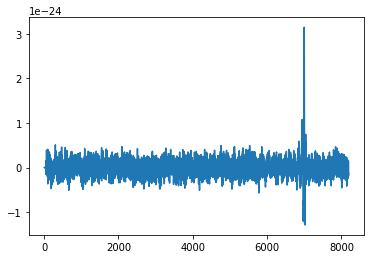

In [15]:
plt.plot(des_1.ix['mean',:8192].values)

/Users/Herb/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:992: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]


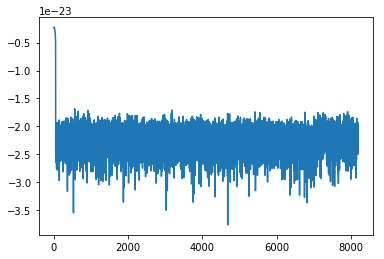

In [16]:
plt.plot(des_1.ix['min',:8192].values)

/Users/Herb/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:992: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]


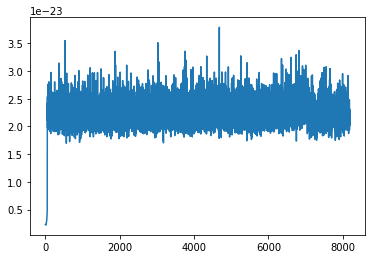

In [17]:
plt.plot(des_1.ix['mean',:8192].values - des_1.ix['min',:8192].values)

In [21]:
batch_size = 256

In [22]:
train = train_dict['1']
test = test_dict['1']

y = nd.array(~train.sigma.isnull() +0)
X = nd.array(Normolise(train.drop(['mass','positions','gaps','max_peak','sigma','SNR_mf','SNR_mf0'],axis=1)))
print('Label for training:', y.shape)
print('Dataset for training:', X.shape, end='\n\n')

dataset_train = gluon.data.ArrayDataset(X, y)
train_data = gluon.data.DataLoader(dataset_train, batch_size, shuffle=True, last_batch='keep')

Label for training: (2000,)
Dataset for training: (2000, 8192)



In [27]:

def init_params(num_fc1 = 64, num_fc2 = 64, num_outputs = 2,nf=1/2, sl=sl):
    #######################
    #  Set the scale for weight initialization and choose
    #  the number of hidden units in the fully-connected layer
    #######################
    weight_scale = .01
    num_fc = num_fc1

    W1 = nd.random_normal(loc=0, scale=weight_scale, shape=(int(16*nf), 1, 1, 16), ctx=ctx )
    W2 = nd.random_normal(loc=0, scale=weight_scale, shape=(int(32*nf), int(16*nf), 1, 8), ctx=ctx )
    W3 = nd.random_normal(loc=0, scale=weight_scale, shape=(int(64*nf), int(32*nf), 1, 8), ctx=ctx )
    W4 = nd.random_normal(loc=0, scale=weight_scale, shape=(sl, num_fc), ctx=ctx )
    W5 = nd.random_normal(loc=0, scale=weight_scale, shape=(num_fc, num_fc), ctx=ctx )    
    W6 = nd.random_normal(loc=0, scale=weight_scale, shape=(num_fc, num_outputs), ctx=ctx )
    b1 = nd.random_normal(shape=int(16*nf), scale=weight_scale, ctx=ctx)
    b2 = nd.random_normal(shape=int(32*nf), scale=weight_scale, ctx=ctx)
    b3 = nd.random_normal(shape=int(64*nf), scale=weight_scale, ctx=ctx)
    b4 = nd.random_normal(shape=num_fc, scale=weight_scale, ctx=ctx)
    b5 = nd.random_normal(shape=num_fc, scale=weight_scale, ctx=ctx)    
    b6 = nd.random_normal(shape=num_outputs, scale=weight_scale, ctx=ctx)
    params = [W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, W6, b6]

    return params
params = init_params()

In [19]:
pool_type='max'
pool_size = 8
pool_stride= 2
# 64256 16
# 64832 6
# 64704 8
# 64960 4
# 65024 2
sl = 32352

In [28]:
def net_2MLP(self, X, params, debug, pool_type='avg',pool_size = 16,pool_stride=2, act_type = 'relu', dilate_size = 1, nf=1,drop_prob=0):
    [W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, W6, b6] = params
    ########################
    #  Define the computation of the first convolutional layer
    ########################
    h1_conv = nd.Convolution(data=X, weight=W1, bias=b1, kernel=(1,16), num_filter=int(16*nf), stride=(1,1),dilate=(1,dilate_size))
    h1_activation = activation(h1_conv, act_type = act_type)
    h1 = nd.Pooling(data=h1_activation, pool_type=pool_type, kernel=(1,pool_size), stride=(1,pool_stride))
    if debug:
        print("h1 shape: %s" % (np.array(h1.shape)))

    ########################
    #  Define the computation of the second convolutional layer
    ########################
    h2_conv = nd.Convolution(data=h1, weight=W2, bias=b2, kernel=(1,8), num_filter=int(32*nf), stride=(1,1),dilate=(1,dilate_size))
    h2_activation = activation(h2_conv, act_type = act_type)
    h2 = nd.Pooling(data=h2_activation, pool_type=pool_type, kernel=(1,pool_size), stride=(1,pool_stride))
    if debug:
        print("h2 shape: %s" % (np.array(h2.shape)))

    ########################
    #  Define the computation of the third convolutional layer
    ########################
    h3_conv = nd.Convolution(data=h2, weight=W3, bias=b3, kernel=(1,8), num_filter=int(64*nf), stride=(1,1),dilate=(1,dilate_size))
    h3_activation = activation(h3_conv, act_type = act_type)
    h3 = nd.Pooling(data=h3_activation, pool_type=pool_type, kernel=(1,pool_size), stride=(1,pool_stride))
    if debug:
        print("h3 shape: %s" % (np.array(h3.shape)))

    ########################
    #  Flattening h3 so that we can feed it into a fully-connected layer
    ########################
    h4 = nd.flatten(h3)
    if debug:
        print("Flat h4 shape: %s" % (np.array(h4.shape)))

    ########################
    #  Define the computation of the 4th (fully-connected) layer
    ########################
    try:
        h5_linear = nd.dot(h4, W4) + b4
    except:
        return h4.shape[-1]        
    h5 = activation(h5_linear, act_type = act_type)
    if debug:
        print("h5 shape: %s" % (np.array(h5.shape)))

    ########################
    #  Define the computation of the 5th (fully-connected) layer
    ########################
    h6_linear = nd.dot(h5, W5) + b5
    h6 = activation(h6_linear, act_type = act_type)
    if debug:
        print("h6 shape: %s" % (np.array(h6.shape)))

    ########################
    #  Define the computation of the output layer
    ########################
    yhat_linear = nd.dot(h6, W6) + b6
    if debug:
        print("yhat_linear shape: %s" % (np.array(yhat_linear.shape)))

    interlayer = [h1, h2, h3, h4, h5, h6]

    return yhat_linear, interlayer

In [19]:
SNR = 1
# params_ = nd.load('./New_params/params_8')
# params_ = nd.load('./SNR1.dms')
print('Start Training at SNR = %s ...' %str(SNR))
Info = Solver(train = train_dict['1']
          ,test = test_dict['1'], Debug=True , params_init = None#params_
             , batch_size=256, lr=0.000000001, epochs=2
             , smoothing_constant = .01, SNR = SNR
             , sl=sl, pool_type=pool_type ,pool_size = pool_size,pool_stride=pool_stride
             , num_fc1 = 64, num_fc2 = 64, num_outputs = 2, period = 256)

# test_accuracy_history_final = [0]
for index, info in enumerate(Info):
    (params, loss_history, loss_v_history, moving_loss_history, test_accuracy_history, train_accuracy_history) = info
    # Save
#     for key, value in {'params':params
# #                                  , 'loss_history': nd.array(loss_history)
# #                                  , 'loss_v_history': nd.array(loss_v_history)
# #                                  , 'moving_loss_history': nd.array(moving_loss_history)
# #                                  , 'test_accuracy_history': nd.array(test_accuracy_history)
# #                                  , 'train_accuracy_history': nd.array(train_accuracy_history)
#                       }.items():

#         nd.save("./%s/%s_%s" %(address,key,index+1), value)

Start Training at SNR = 1 ...
Label for training: (2000,)
Dataset for training: (2000, 8192)

Label for testing: (2000,)
Dataset for testing: (2000, 8192)



NameError: name 'init_params' is not defined

In [18]:
params_ = nd.load('./SNR1.dms')
[W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, W6, b6] = params_
params_ = {}
for i, name in zip(list([W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, W6, b6]), \
                   list(['W1', 'b1', 'W2', 'b2', 'W3', 'b3', 'W4', 'b4', 'W5', 'b5', 'W6', 'b6'])):
    params_['{}'.format(name)] = i

MXNetError: [01:08:59] src/io/local_filesys.cc:166: Check failed: allow_null  LocalFileSystem::Open "./SNR1.dms": No such file or directory

Stack trace returned 8 entries:
[bt] (0) 0   libmxnet.so                         0x000000010b9f13b4 libmxnet.so + 21428
[bt] (1) 1   libmxnet.so                         0x000000010b9f116f libmxnet.so + 20847
[bt] (2) 2   libmxnet.so                         0x000000010b9f0de9 libmxnet.so + 19945
[bt] (3) 3   libmxnet.so                         0x000000010cfb29f9 MXTVMBridge + 3751961
[bt] (4) 4   libmxnet.so                         0x000000010cfabce4 MXTVMBridge + 3724036
[bt] (5) 5   libmxnet.so                         0x000000010ca4fda3 MXNDArrayLoad + 227
[bt] (6) 6   libffi.6.dylib                      0x0000000109b28884 ffi_call_unix64 + 76
[bt] (7) 7   ???                                 0x00007ffee83d1200 0x0 + 140732794737152



In [76]:
model = ConvNet(conv_params = {'kernel': ((1,16), (1,8), (1,8), (1,8)), 
                               'num_filter': (16//2, 32//2, 64//2, 64),
                               'stride': ((1,1), (1,1), (1,1), (1,1)),
                               'padding': ((0,0), (0,0), (0,0), (0,0)),
                               'dilate': ((1,1), (1,1), (1,1), (1,1))},
                act_params = {'act_type': ('relu', 'relu', 'relu', 'relu', 'relu', 'relu')},
                pool_params = {'pool_type': ('max', 'max', 'max', 'max'),
                               'kernel': ((1,8), (1,8), (1,8), (1,8)),
                               'stride': ((1,2), (1,2), (1,2), (1,2)),
                               'padding': ((0,0), (0,0), (0,0), (0,0)),
                               'dilate': ((1,1), (1,1), (1,1), (1,1))},
                fc_params = {'hidden_dim': (128, 64)})

Loading the params...


In [77]:
train = train_dict['1']
batch_size = 2000
num_examples = train.shape[0]
# 训练集数据类型转换
y = nd.array(~train.sigma.isnull() +0)
X = nd.array(Normolise(train.drop(['mass','positions','gaps','max_peak','sigma','SNR_mf','SNR_mf0'],axis=1)))
print('Label for training:', y.shape)
print('Dataset for training:', X.shape, end='\n\n')

dataset_train = gluon.data.ArrayDataset(X, y)
train_data = gluon.data.DataLoader(dataset_train, batch_size, shuffle=True, last_batch='keep')

Label for training: (2000,)
Dataset for training: (2000, 8192)



In [78]:
for data, _ in train_data:
    data = data.as_in_context(ctx).reshape((batch_size,1,1,-1))
    break

In [79]:
yhat, interlayer = model.network(data, debug=True)

layer1 shape: (2000, 8, 1, 4085)
layer2 shape: (2000, 16, 1, 2036)
layer3 shape: (2000, 32, 1, 1011)
layer4 shape: (2000, 64, 1, 499)
After Flattened, Data shape: (2000, 31936)
layer5 shape: (2000, 128)
layer6 shape: (2000, 64)
Output shape: (2000, 2)


hidden layer 1 had mean 0.047908 and std 0.026002
hidden layer 2 had mean 0.005247 and std 0.006917
hidden layer 3 had mean 0.003137 and std 0.004818
hidden layer 4 had mean 0.004003 and std 0.005328
hidden layer 5 had mean 0.004003 and std 0.005328
hidden layer 6 had mean 0.006333 and std 0.009136
hidden layer 7 had mean 0.003894 and std 0.005068
hidden layer 8 had mean -0.006937 and std 0.001433


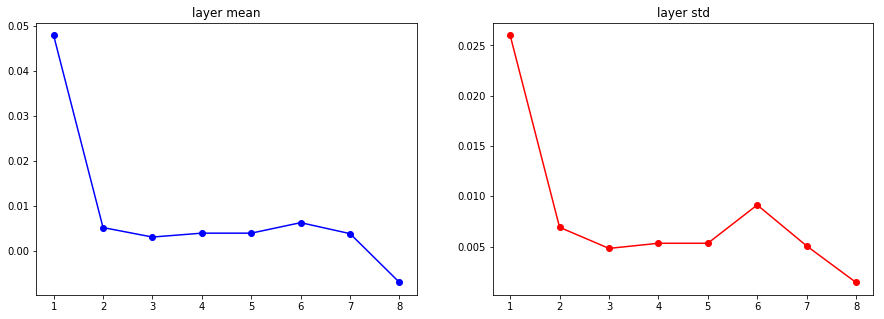

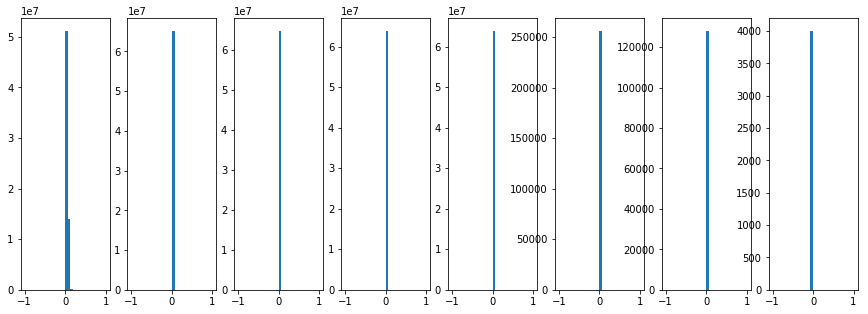

In [80]:
layer_means = [ i.asnumpy().mean() for i in interlayer]
layer_stds = [ i.asnumpy().std() for i in interlayer]

for i, _ in enumerate(layer_mean):
    print('hidden layer %d had mean %f and std %f' %(i+1, layer_means[i], layer_stds[i]))
    
# plot the means and standard deviations
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(list(range(1,len(layer_mean)+1)), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(list(range(1,len(layer_mean)+1)), layer_stds, 'or-')
plt.title('layer std')

# # plot the raw distributions
plt.figure(figsize=(15,5))
for i, _ in enumerate(layer_mean):
    plt.subplot(1, len(layer_mean), i+1)
    plt.hist(interlayer[i].asnumpy().ravel(), 30, range=(-1,1))    

In [15]:
# data_test.SNR_mf.value_counts()

# Predict

Yes! GW signal founded! SNR = 23.00558147572624
1.0


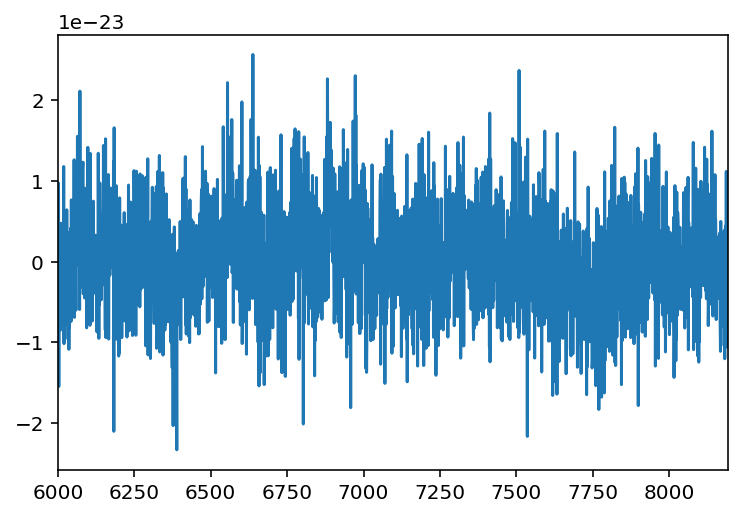

In [192]:
tt = test_dict['1'].sample(1)
sample_snr_mf = tt.SNR_mf.fillna(0).values.tolist()[0]
if sample_snr_mf: 
    print('Yes! GW signal founded! SNR = {}'.format(sample_snr_mf))
else:
    print('No GW signal!')
output, _ = predict(tt, ConvNet, params_)
print(output)
tt.iloc[:,6000:8192].T.plot(legend = False)

# LIGO

In [2]:
import sys
from utils import *
from data_utils import *
from solver import *
from cnn import *

import numpy as np
import pandas as pd

import h5py
# LIGO-specific readligo.py 
import readligo as rl
# the ipython magic below must be commented out in the .py file, since it doesn't work.
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
#----------------------------------------------------------------
# Load LIGO data from a single file
#----------------------------------------------------------------
# eventname = 'GW150914' 
eventname = 'GW151226'  #
# eventname = 'LVT151012' 
# eventname = 'GW170104'
# eventname = 'O1'

if eventname == 'GW150914':
    # Strain Data at 16384 Hz | Hanford | 32 seconds | approx 4 Mbyte
    fn_H1 = 'H-H1_LOSC_16_V2-1126259446-32.hdf5'
    # Strain Data at 16384 Hz | Livingston | 32 seconds | approx 4 Mbyte
    fn_L1 = 'L-L1_LOSC_16_V2-1126259446-32.hdf5'

    # Strain Data at 16384 Hz | Hanford | 4096 seconds | approx 536 Mbyte
    fn_H1 = 'H-H1_LOSC_16_V2-1126257414-4096.hdf5'
    # Strain Data at 16384 Hz | Livingston | 4096 seconds | approx 536 Mbyte
    fn_L1 = 'L-L1_LOSC_16_V2-1126257414-4096.hdf5'

elif eventname == 'LVT151012':
    # Strain Data at 16384 Hz | Hanford | 32 seconds | (event is 16.44 seconds from start)
    fn_H1 = 'H-H1_LOSC_16_V2-1128678884-32.hdf5'
    # Strain Data at 16384 Hz | Hanford | 32 seconds | (event is 16.44 seconds from start)
    fn_L1 = 'L-L1_LOSC_16_V2-1128678884-32.hdf5'
    
    # Strain Data at 16384 Hz | Hanford | 4096 seconds | (event is 2048.44 seconds from start)
    fn_H1 = 'H-H1_LOSC_16_V2-1128676852-4096.hdf5'
    # Strain Data at 16384 Hz | Hanford | 4096 seconds | (event is 2048.44 seconds from start)
    fn_L1 = 'L-L1_LOSC_16_V2-1128676852-4096.hdf5'
    
elif eventname == 'GW151226':
    # Strain Data at 16384 Hz | Hanford | 32 seconds | (event is 16.65 seconds from start)
    fn_H1 = 'H-H1_LOSC_16_V2-1135136334-32.hdf5'
    # Strain Data at 16384 Hz | Hanford | 32 seconds | (event is 16.65 seconds from start)
    fn_L1 = 'L-L1_LOSC_16_V2-1135136334-32.hdf5'
    
    # Strain Data at 16384 Hz | Hanford | 4096 seconds | (event is 122.65 seconds from start)
    fn_H1 = 'H-H1_LOSC_16_V2-1135136228-4096.hdf5'
    # Strain Data at 16384 Hz | Hanford | 4096 seconds | (event is 122.65 seconds from start)
    fn_L1 = 'L-L1_LOSC_16_V2-1135136228-4096.hdf5'
    
elif eventname == 'GW170104':
    # Strain Data at 16384 Hz | Hanford | 4096 seconds | (event is 16.60 seconds from start)    
    fn_H1 = 'H-H1_LOSC_16_V1-1167557888-4096.hdf5'
    # Strain Data at 16384 Hz | Hanford | 4096 seconds | (event is 2048.60 seconds from start)    
    fn_L1 = 'L-L1_LOSC_16_V1-1167557888-4096.hdf5'
    
elif eventname == 'O1':
    fn_H1 = 'H-H1_LOSC_16_V1-1134104576-4096.hdf5'
    fn_L1 = fn_H1

strain_H1, time_H1, chan_dict_H1 = rl.loaddata(fn_H1, 'H1')
strain_L1, time_L1, chan_dict_L1 = rl.loaddata(fn_L1, 'L1')
strain_H1 = strain_H1[::2]
time_H1 = time_H1[::2]
strain_L1 = strain_L1[::2]
time_L1 = time_L1[::2]


# sampling rate:
fs = 16384//2
# both H1 and L1 will have the same time vector, so:
time = time_H1
# the time sample interval (uniformly sampled!)
dt = time[1] - time[0]


# First, let's look at the data and print out some stuff:

# this doesn't seem to work for scientific notation:
# np.set_printoptions(precision=4)

print('  time_H1: len, min, mean, max = ', \
   len(time_H1), time_H1.min(), time_H1.mean(), time_H1.max() )
print( 'strain_H1: len, min, mean, max = ', \
   len(strain_H1), strain_H1.min(),strain_H1.mean(),strain_H1.max())

print('  time_L1: len, min, mean, max = ', \
   len(time_L1), time_L1.min(), time_L1.mean(), time_L1.max() )
print( 'strain_H1: len, min, mean, max = ', \
   len(strain_L1), strain_L1.min(),strain_L1.mean(),strain_L1.max())

  time_H1: len, min, mean, max =  33554432 1135136228.0 1135138276.0 1135140324.0
strain_H1: len, min, mean, max =  33554432 -1.19963394191e-18 -3.01539805169e-24 1.107563261e-18
  time_L1: len, min, mean, max =  33554432 1135136228.0 1135138276.0 1135140324.0
strain_H1: len, min, mean, max =  33554432 -7.4608424409e-18 -1.13843187615e-18 5.60524851175e-18


In [4]:
1135136228.0 - 1135136350

-122.0

Text(0.5,1,'Advanced LIGO strain data near GW151226')

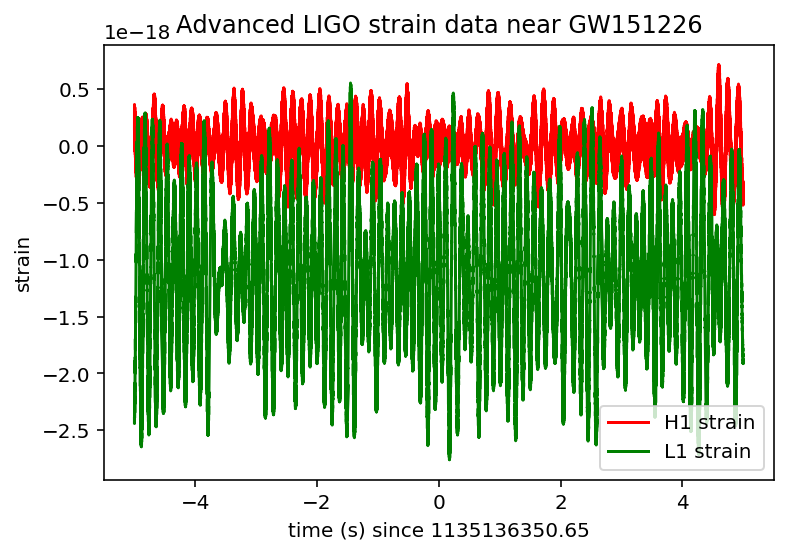

In [5]:
# plot +- 5 seconds around the event:
deltat = 5.                     # seconds around the event
if eventname == 'GW150914':
    tevent = 1126259462.422         # Mon Sep 14 09:50:45 GMT 2015 
elif eventname == 'LVT151012':
    tevent = 1128678900.44
elif eventname == 'GW151226':
    tevent = 1135136350.65
elif eventname == 'GW170104':
    tevent = 1167559936.6

# index into the strain time series for this time interval:
indxt = np.where((time_H1 >= tevent-deltat) & (time_H1 < tevent+deltat))

plt.figure()
# plt.plot(time_H1-tevent,strain_H1,'r',label='H1 strain')
plt.plot(time_H1[indxt]-tevent,strain_H1[indxt],'r',label='H1 strain')
plt.plot(time_L1[indxt]-tevent,strain_L1[indxt],'g',label='L1 strain')
plt.xlabel('time (s) since '+str(tevent))
plt.ylabel('strain')
plt.legend(loc='lower right')
plt.title('Advanced LIGO strain data near {}'.format(eventname))

In [6]:
time_H1.min() - 1126259462

8876766.0

In [7]:
frac = 20
Slice = [(i+ 8192*i//frac, i+ 8192*i//frac +8192) for i in range(strain_H1.size) if i+ 8192*i//frac +8192 <= strain_H1.size]

In [8]:
params_ = nd.load('./SNR1.dms')
output_H1_list = []
output_L1_list = []
score_H1_list = []
score_L1_list = []
for i, (l, r) in enumerate(Slice):
    output_H1, score_H1 = predict_(strain_H1[l:r].reshape((1,-1)), ConvNet, params_)
    output_L1, score_L1 = predict_(strain_L1[l:r].reshape((1,-1)), ConvNet, params_)
    output_H1_list.append(output_H1)
    output_L1_list.append(output_L1)
    score_H1_list.append(score_H1)
    score_L1_list.append(score_L1)    
    
#     print('(complete percent: {:.2f}/100)'.format(1.0 * i / len(Slice) * 100) , end='')
#     sys.stdout.write("\r")
print('Finished!')

Finished!


In [9]:
print(pd.Series(output_H1_list).value_counts())
print(pd.Series(output_L1_list).value_counts())

1.000000e+00    81573
9.999999e-01       16
9.999998e-01        8
9.999995e-01        7
9.999996e-01        5
9.999988e-01        2
9.999985e-01        2
9.999992e-01        2
9.999993e-01        2
9.999819e-01        2
9.999911e-01        2
9.999847e-01        1
9.999987e-01        1
9.999914e-01        1
9.999980e-01        1
9.999869e-01        1
9.999977e-01        1
9.999834e-01        1
9.999683e-01        1
1.291528e-09        1
1.118680e-03        1
3.145419e-06        1
2.898753e-01        1
2.914129e-01        1
2.290061e-03        1
1.733021e-01        1
2.208178e-07        1
3.410083e-01        1
3.395944e-07        1
9.999990e-01        1
                ...  
9.999850e-01        1
9.999859e-01        1
9.999872e-01        1
9.999907e-01        1
9.999915e-01        1
9.999925e-01        1
9.999950e-01        1
9.999499e-01        1
9.999337e-01        1
9.999961e-01        1
9.986817e-01        1
9.904341e-01        1
2.522651e-11        1
7.541609e-05        1
9.965895e-

In [205]:
pd.Series(output_H1_list)[pd.Series(output_H1_list) != 1]

46871    1.000000
71644    0.999983
76476    0.999999
76767    1.000000
76813    0.999997
dtype: float64

In [203]:
tt = np.array(output_H1_list)
tt.argmin()

71644

No handles with labels found to put in legend.


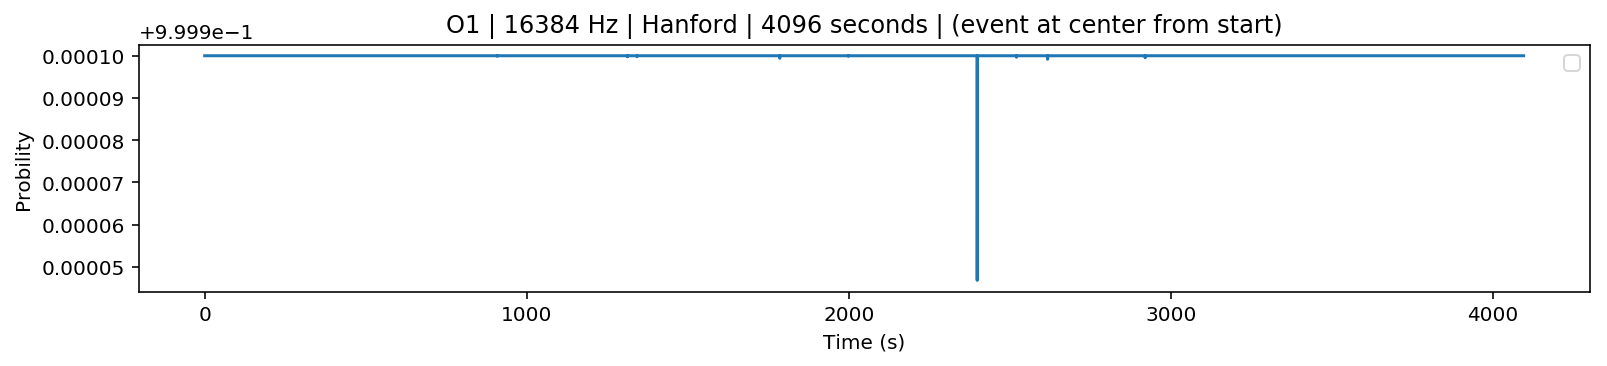

In [232]:
ss = None
plt.figure(figsize=(13,5))
plt.subplot(2,1,1)
plt.plot(np.linspace(1/frac, 4096-1/frac, len(output_H1_list))[:ss], output_H1_list[:ss])
# plt.vlines(x=4096//2, ymin = 0, ymax=1, color = 'r', linestyles='dashed',label = '%s'%eventname)
plt.xlabel('Time (s)')
plt.ylabel('Probility')
plt.title('%s | 16384 Hz | Hanford | 4096 seconds' %eventname)
plt.legend()

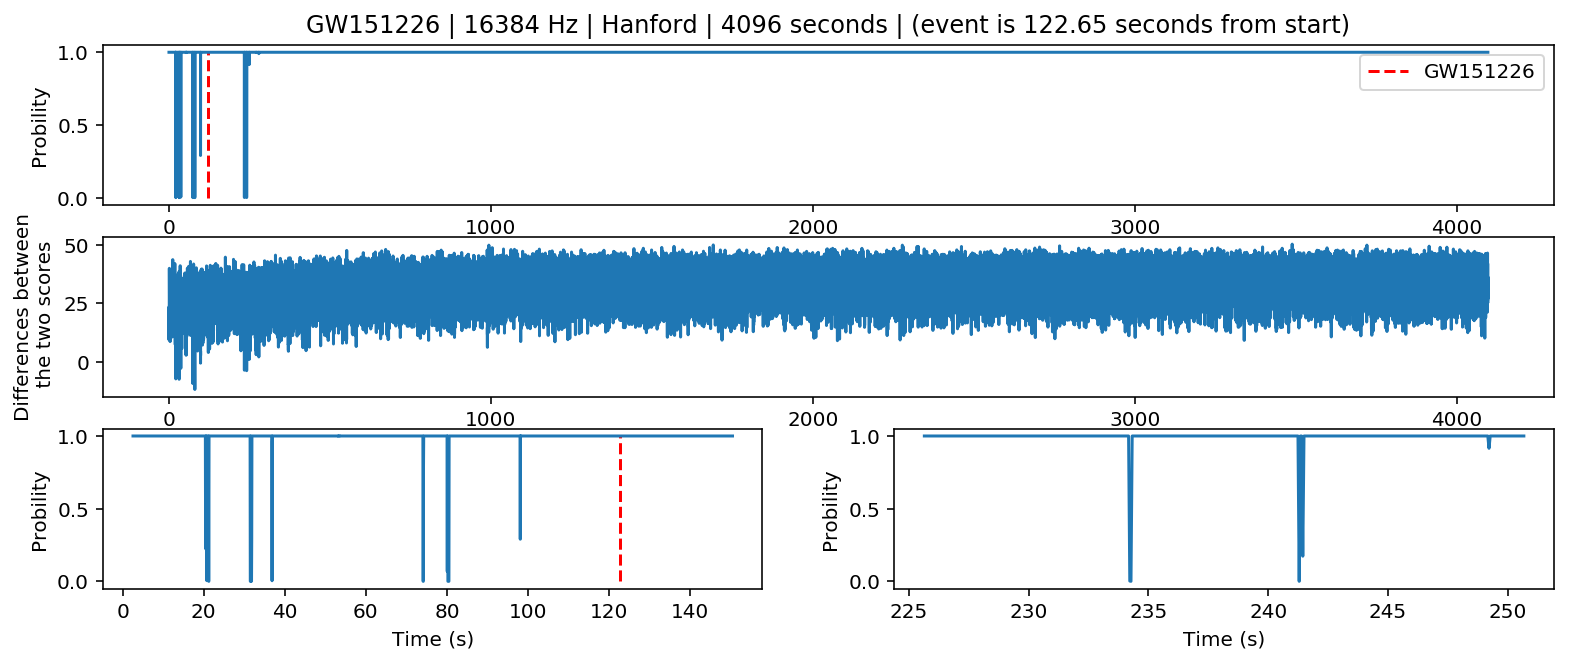

In [20]:
ss = None
plt.figure(figsize=(13,5))
plt.subplot(3,1,1)
plt.plot(np.linspace(1/frac, 4096-1/frac, len(output_H1_list))[:ss], output_H1_list[:ss])
plt.vlines(x=122.65, ymin = 0, ymax=1, color = 'r', linestyles='dashed',label = '%s'%eventname)
plt.xlabel('Time (s)')
plt.ylabel('Probility')
plt.title('%s | 16384 Hz | Hanford | 4096 seconds | (event is 122.65 seconds from start)' %eventname)
plt.legend()

plt.subplot(3,1,2)
plt.plot(np.linspace(1/frac, 4096-1/frac, len(score_H1_list)), [i.asnumpy()[0][1] for i in score_H1_list])
plt.ylabel('Differences between\n the two scores')


s1 = 50
s2 = 3000
plt.subplot(3,2,5)
plt.plot(np.linspace(1/frac, 4096-1/frac, len(output_H1_list))[s1:s2], output_H1_list[s1:s2])
plt.vlines(x=122.65, ymin = 0, ymax=1, color = 'r', linestyles='dashed')
plt.xlabel('Time (s)')
plt.ylabel('Probility')
s1 = 4500
s2 = 5000
plt.subplot(3,2,6)
plt.plot(np.linspace(1/frac, 4096-1/frac, len(output_H1_list))[s1:s2], output_H1_list[s1:s2])
# plt.vlines(x=122.65, ymin = 0, ymax=1, color = 'r', linestyles='dashed')
plt.xlabel('Time (s)')
plt.ylabel('Probility')
plt.savefig('%s.png' %eventname, dpi=300, bbox_inches = 'tight')

In [171]:
len(output_H1_list)

81701

![](./reconstruction_comparison.jpeg)

In [217]:
noise1 = pd.read_csv('../Noise_data1/LigoNose9_9000_8192_1.csv', index_col=0, nrows=2)
print('The shape of the noise1: ', noise1.shape)
predict_(noise1, ConvNet, params_)

The shape of the noise1:  (2, 8192)


(9.02911168054743e-09, 
 [[  9.63237476  -8.89043713]
  [ 12.2650013  -11.33372784]]
 <NDArray 2x2 @cpu(0)>)

In [25]:
params_ = nd.load('./SNR1.dms')
oo = test_dict['1'].sample(1)
print('SNR:', oo.SNR_mf.values[0])
try:
    oo_GW = data_GW_test.loc[oo.mass].values/oo.sigma.values
except:
    oo_GW = np.zeros_like(oo)
oo = oo.drop(['mass','positions','gaps','max_peak','sigma','SNR_mf','SNR_mf0'],axis=1).values

for i in range(10):
    oo_ = test_dict['1'].sample(1)
    print('SNR:', oo_.SNR_mf.values[0])
    try:
        oo_GW_ = data_GW_test.loc[oo_.mass].values/oo_.sigma.values
    except:
        oo_GW_ = np.zeros_like(oo_)    
    oo_ = oo_.drop(['mass','positions','gaps','max_peak','sigma','SNR_mf','SNR_mf0'],axis=1).values
    oo = np.concatenate([oo[:7000], oo_], axis = 1)
    oo_GW = np.concatenate([oo_GW[:7000], oo_GW_], axis = 1)
    
frac_ = 20
Slice_ = [(i+ 8192*i//frac_, i+ 8192*i//frac_ +8192) for i in range(oo.size) if i+ 8192*i//frac_ +8192 <= oo.size]

prob_list = []
output_list = []
for i, (l, r) in enumerate(Slice_):
    prob, output = predict_(oo[:, l:r], ConvNet, params_)
    prob_list.append(prob)
    output_list.append(output)

SNR: nan
SNR: 24.4804084285
SNR: nan
SNR: 24.361321608
SNR: 22.4378418331
SNR: 25.5750243784
SNR: 24.9205175095
SNR: nan
SNR: nan
SNR: 23.1277843263
SNR: 24.6973627746


Text(0,0.5,'Differences between\n the two scores')

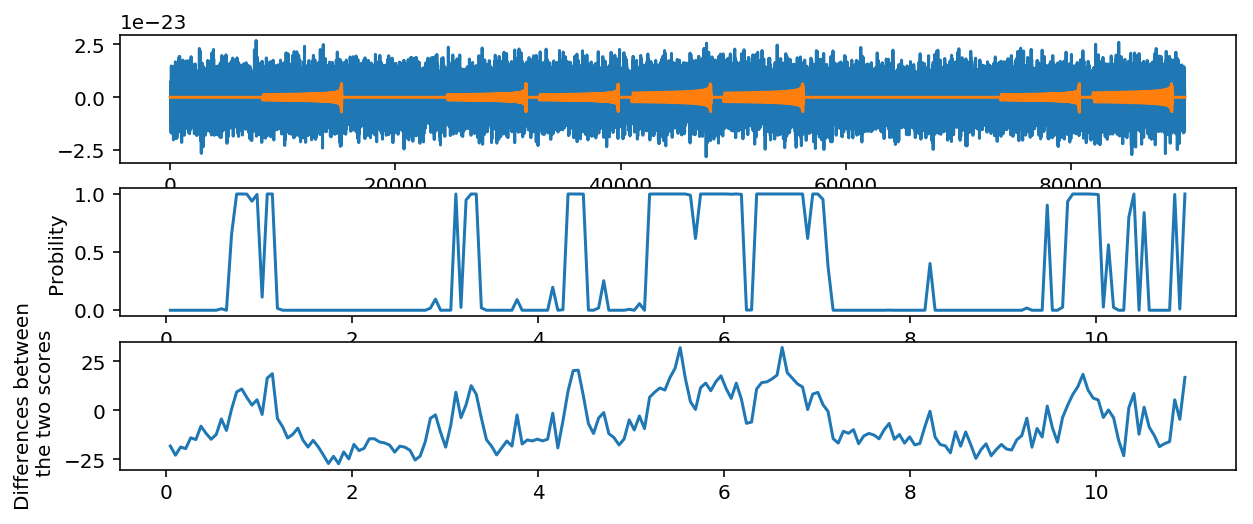

In [27]:
plt.figure(figsize=(10,4))
plt.subplot(3,1,1)
plt.plot(oo.T)
plt.plot(oo_GW.T)
plt.subplot(3,1,2)
plt.plot(np.linspace(1/20, oo.size//8192 -1/20, len(prob_list)), prob_list)
plt.xlabel('Time (s)')
plt.ylabel('Probility')

plt.subplot(3,1,3)
plt.plot(np.linspace(1/20, oo.size//8192 -1/20, len(prob_list)), [i.asnumpy()[0][1]-i.asnumpy()[0][0] for i in output_list])
plt.ylabel('Differences between\n the two scores')

In [175]:
# 制作测试集
y = nd.array(~test_dict['%s' %str(1)].sigma.isnull() +0)
X = nd.array(Normolise(test_dict['%s' %str(1)].drop(['mass','positions','gaps','max_peak','sigma','SNR_mf','SNR_mf0'],axis=1)))
num_examples = y.shape[0]

In [176]:
batch_size = 5
dataset_test = gluon.data.ArrayDataset(X, y)
test_data = gluon.data.DataLoader(dataset_test, batch_size, shuffle=True, last_batch='keep') 

In [179]:
ytrain_true_ = []
output_ = []
for batch_i, (data, label) in enumerate(test_data):
    data = data.as_in_context(ctx).reshape((data.shape[0],1,1,-1))
    label = label.as_in_context(ctx)
    output, interlayer = ConvNet(data, params_)

    ytrain_true_.extend(label.asnumpy().tolist())   # 保存每个真实标签结果
    output_.extend(output.asnumpy().tolist())
    print('(complete percent: %.2f/100' %( 1.0 * batch_i *batch_size/ (num_examples) * 100) +')' , end='')
    sys.stdout.write("\r")
    if batch_i==0:
        break

print()
print('Finished!', end='')
sys.stdout.write("\r")

(complete percent: 0.00/100)


In [182]:
output_

[[10.385242462158203, -9.590752601623535],
 [-7.965394020080566, 6.960514545440674],
 [11.520044326782227, -10.639552116394043],
 [5.169904708862305, -4.822538375854492],
 [9.44728946685791, -8.732126235961914]]

In [183]:
ytrain_true_

[0.0, 1.0, 0.0, 1.0, 0.0]

In [221]:
pd.concat([oo_, oo_], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
106,5.769983e-27,1.022829e-26,1.041778e-26,-6.413653e-28,-4.051670e-28,1.179871e-26,1.435680e-27,-3.075945e-27,1.987967e-27,-3.551991e-27,...,-6.651750e-24,1.191800e-24,8.043205e-24,-1.110582e-23,3.340252e-24,-4.802922e-25,-1.143168e-24,-8.822579e-24,9.220874e-24,-7.175588e-24


In [92]:
try:
    raise 
except:
    print(32)

32


In [73]:
print(54) , print(43)

54
43


In [1]:
a = 100
while True:
    try:
        y = int(input('submit:'))
        assert y != 2
    except:
        continue
        print(434)
        
        
        
    try:
        x = int(input('submit:'))
        print(2 / x)
    except Exception as e:
        print('Boss: 这是什么鬼?',e)
        print('滚去加班！')
    else:
        print('else')
#         break
        if x == 5:
            break
    finally:
        print('finally')
        a -= 50
        print(a)
    if a == 0:
        print('dead')
        print(a)

submit: 2
submit: 2
submit: 3
submit: 3


0.6666666666666666
else
finally
50


submit: 5
submit: 4


0.5
else
finally
0
dead
0


submit: 5
submit: 5


0.4
else
finally
-50
